# Portfolio Risk Management

## What is portfolio risk management?

Portfolio risk management is the collection and analysis of risks across individual portfolio investments, such as stocks, bonds, money market funds, and cash. Risk is the probability that actual investment returns are less than those that are projected.

## What am I going to do in this notebook?

This notebook is the first practice for portfolio risk management. I am learning the theory in sync with doing practice on this notebook, to easily grasp at the concepts.

## Part 1: Univariate Investment Risk and Return

**Basic concepts:**

- Investment risk is a measure of uncertainty of future returns (or in other words, variance of those returns).
- Discrete stock return = (today's stock price - yesterday's stock price) / yesterday's stock price
- Financial returns:
    - Tend not to be normally distributed
    - Has high probability of outliers
- Standard Deviation is Volatility (usually denoted by σ), which is the degree of variation of a trading price series over time.
- Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. In finance, we want to have a positive skew.
- Kurtosis is a measure of thickness of the tails of a distribution. In normal distribution, kurtosis = 3.
    - Leptokurtic indicates whether kurtosis greater than 3 or not.
    - Excess kurtosis = kurtosis - 3 is claimed using `scipy.stats.kurtosis`.
- Test for normality using the Shapiro-Wilk test.
    - Null hypotheis: data are normally distributed.
    - If p-value <= 0.05 then the null hypothesis is rejected, and the data is non-normally distributed.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, shapiro
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Big9Returns2017.csv', parse_dates=['Date'])
df.head()

,Date,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
0,2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
1,2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811
2,2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806
3,2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924
4,2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    251 non-null    datetime64[ns]
 1   AAPL    251 non-null    float64       
 2   MSFT    251 non-null    float64       
 3   XOM     251 non-null    float64       
 4   JNJ     251 non-null    float64       
 5   JPM     251 non-null    float64       
 6   AMZN    251 non-null    float64       
 7   GE      251 non-null    float64       
 8   FB      251 non-null    float64       
 9   T       251 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 19.7 KB


In [19]:
df.describe()

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,0.001637,0.001405,-0.000130,0.000897,0.000997,0.001856,-0.002152,0.001763,-0.000106
std,0.011091,0.009325,0.007043,0.007208,0.010230,0.013207,0.012483,0.010716,0.010697
min,-0.038777,-0.037740,-0.020191,-0.031021,-0.038124,-0.035419,-0.071742,-0.044975,-0.061011
25%,-0.003720,-0.003250,-0.003879,-0.002764,-0.004167,-0.004013,-0.006697,-0.003834,-0.005520
50%,0.000667,0.000731,0.000124,0.000075,0.000117,0.001425,-0.001591,0.001070,0.000000
75%,0.006761,0.006428,0.004372,0.005055,0.006865,0.008580,0.004382,0.008237,0.005646
max,0.060981,0.064119,0.020905,0.034308,0.035258,0.132164,0.035791,0.042490,0.049972


In [4]:
stocks = df.columns.difference(['Date'])
stocks

Index(['AAPL', 'AMZN', 'FB', 'GE', 'JNJ', 'JPM', 'MSFT', 'T', 'XOM'], dtype='object')

Stock code: AAPL


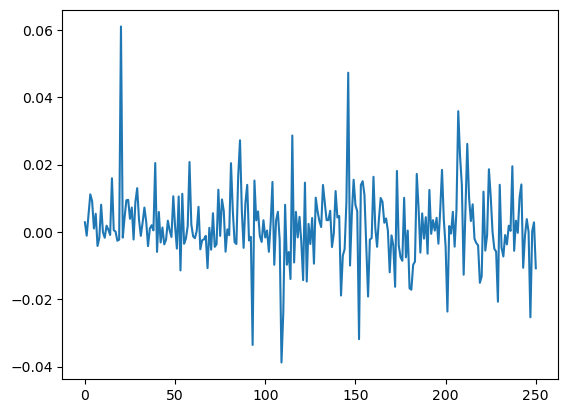

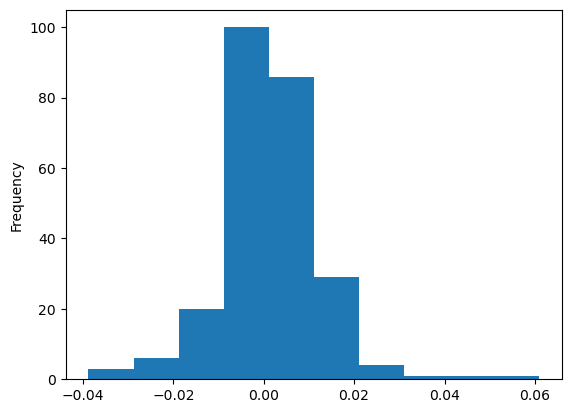

Daily average return: 0.0016365629880900122
Annualized average return: 0.5099503509215253
Daily standard deviation of return (volatility): 0.011068440062785454
Annualized standard deviation of return (volatility): 0.011068440062785454
Skewness of returns distribution: 0.5754598164679054
Kurtosis of returns distribution: 7.8329066662100315
Shapiro results: ShapiroResult(statistic=0.9328486919403076, pvalue=2.8534408169633707e-09)
P-value:  2.8534408169633707e-09 < 0.05 => the data distribution is non-normal
--------------------------------------------------
Stock code: AMZN


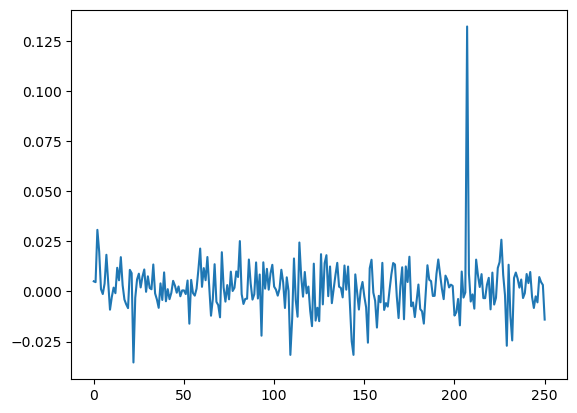

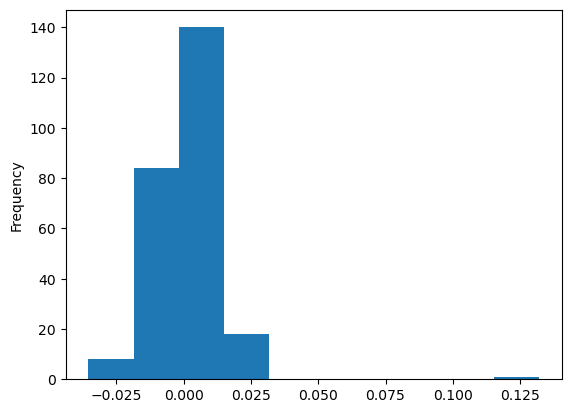

Daily average return: 0.0018563663780647177
Annualized average return: 0.5957927836285324
Daily standard deviation of return (volatility): 0.013180572434256221
Annualized standard deviation of return (volatility): 0.013180572434256221
Skewness of returns distribution: 3.5685074040352496
Kurtosis of returns distribution: 39.590480735927244
Shapiro results: ShapiroResult(statistic=0.772789478302002, pvalue=2.324810136734373e-18)
P-value:  2.324810136734373e-18 < 0.05 => the data distribution is non-normal
--------------------------------------------------
Stock code: FB


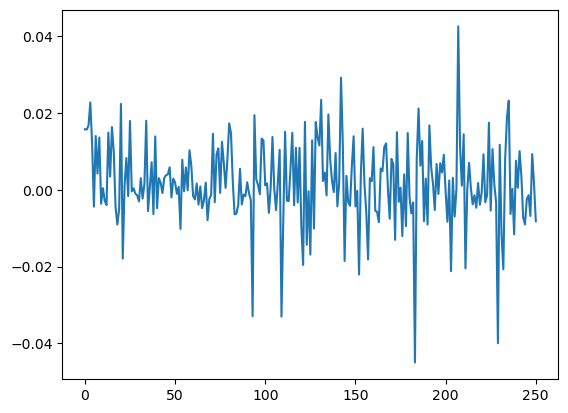

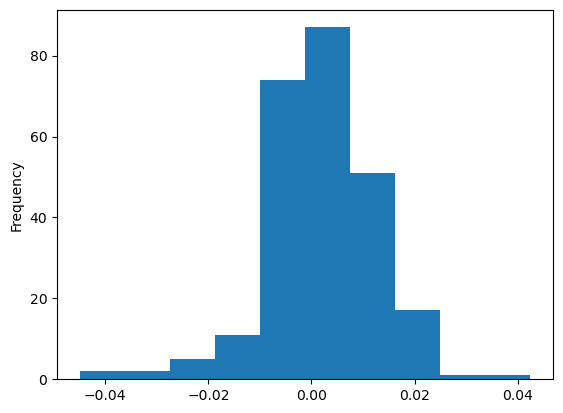

Daily average return: 0.0017628445040918513
Annualized average return: 0.5586899836232722
Daily standard deviation of return (volatility): 0.010694458725347442
Annualized standard deviation of return (volatility): 0.010694458725347442
Skewness of returns distribution: -0.4823558990337609
Kurtosis of returns distribution: 5.750775954957259
Shapiro results: ShapiroResult(statistic=0.9552033543586731, pvalue=5.221606329541828e-07)
P-value:  5.221606329541828e-07 < 0.05 => the data distribution is non-normal
--------------------------------------------------
Stock code: GE


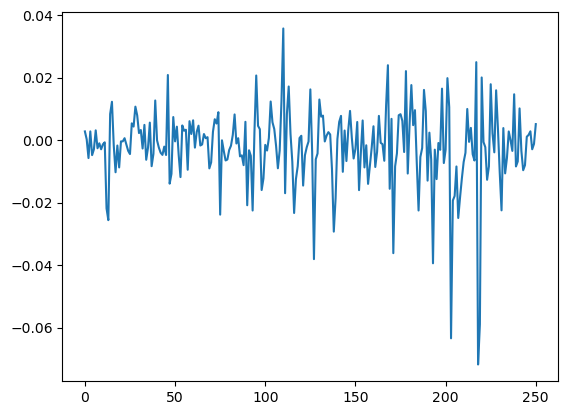

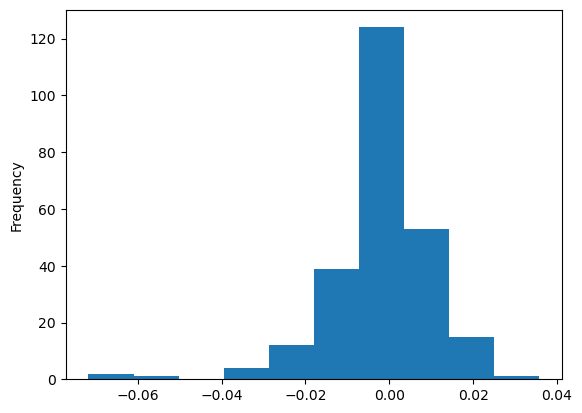

Daily average return: -0.002152303555862823
Annualized average return: -0.4189770480400955
Daily standard deviation of return (volatility): 0.012458362582982324
Annualized standard deviation of return (volatility): 0.012458362582982324
Skewness of returns distribution: -1.5966709687614837
Kurtosis of returns distribution: 10.225439654175005
Shapiro results: ShapiroResult(statistic=0.8819807767868042, pvalue=4.757101288409282e-13)
P-value:  4.757101288409282e-13 < 0.05 => the data distribution is non-normal
--------------------------------------------------
Stock code: JNJ


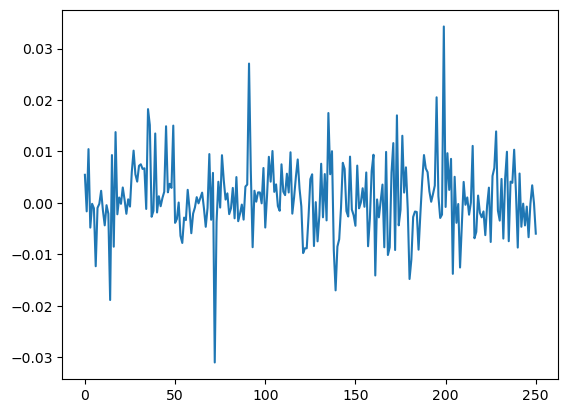

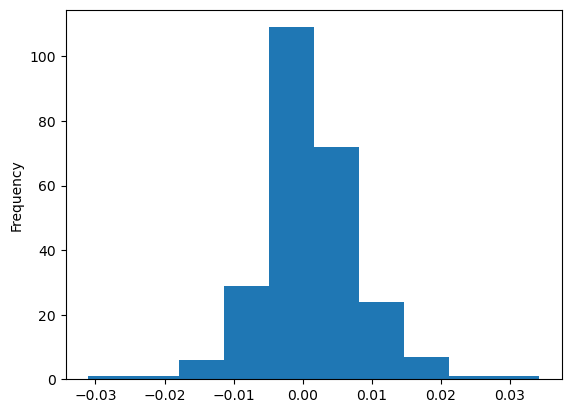

Daily average return: 0.0008968544901825382
Annualized average return: 0.25345789015226683
Daily standard deviation of return (volatility): 0.007193564380655707
Annualized standard deviation of return (volatility): 0.007193564380655707
Skewness of returns distribution: 0.28725534174798345
Kurtosis of returns distribution: 6.276120946947044
Shapiro results: ShapiroResult(statistic=0.9592958688735962, pvalue=1.5798581216586172e-06)
P-value:  1.5798581216586172e-06 < 0.05 => the data distribution is non-normal
--------------------------------------------------
Stock code: JPM


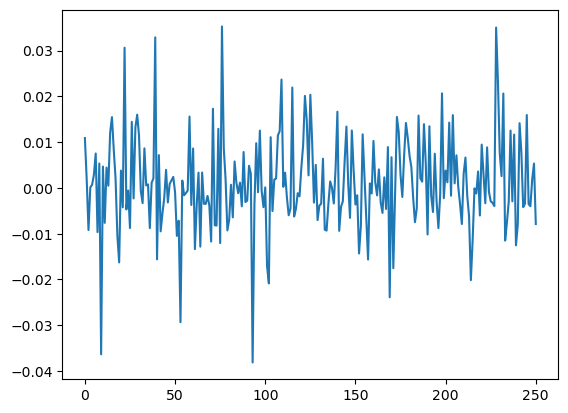

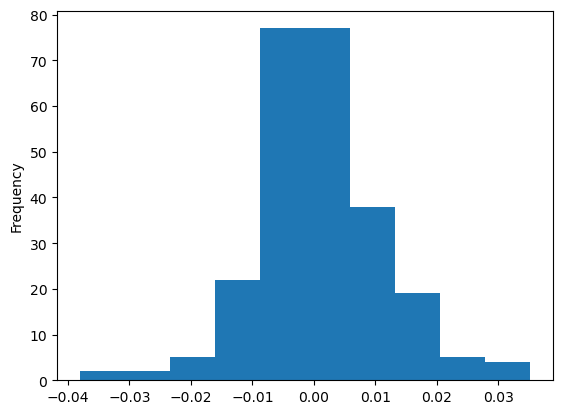

Daily average return: 0.000997171039713136
Annualized average return: 0.2855181891829057
Daily standard deviation of return (volatility): 0.010209311431955418
Annualized standard deviation of return (volatility): 0.010209311431955418
Skewness of returns distribution: 0.0957609935308037
Kurtosis of returns distribution: 5.040394286452681
Shapiro results: ShapiroResult(statistic=0.964812159538269, pvalue=7.756769264233299e-06)
P-value:  7.756769264233299e-06 < 0.05 => the data distribution is non-normal
--------------------------------------------------
Stock code: MSFT


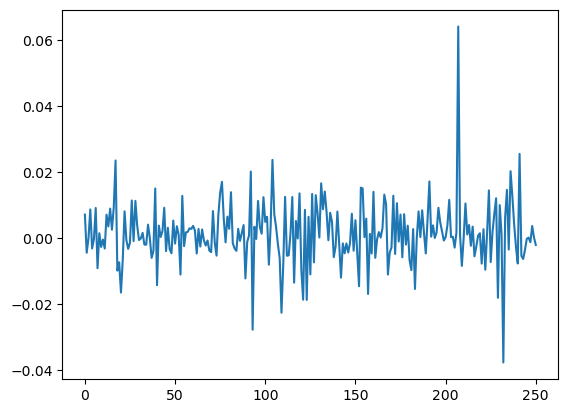

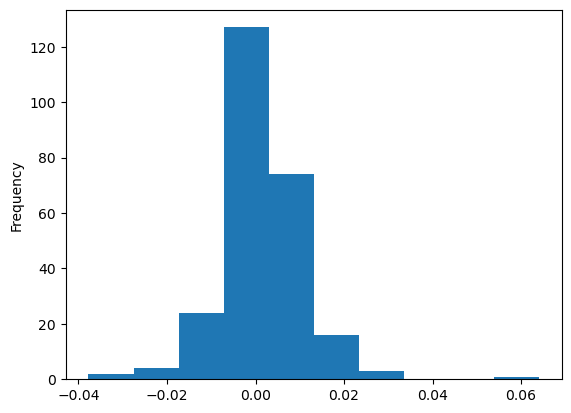

Daily average return: 0.001405223508794589
Annualized average return: 0.42456677615481975
Daily standard deviation of return (volatility): 0.009306242470890859
Annualized standard deviation of return (volatility): 0.009306242470890859
Skewness of returns distribution: 0.8600576563864423
Kurtosis of returns distribution: 11.672851104304812
Shapiro results: ShapiroResult(statistic=0.9143781661987305, pvalue=8.262541345560592e-11)
P-value:  8.262541345560592e-11 < 0.05 => the data distribution is non-normal
--------------------------------------------------
Stock code: T


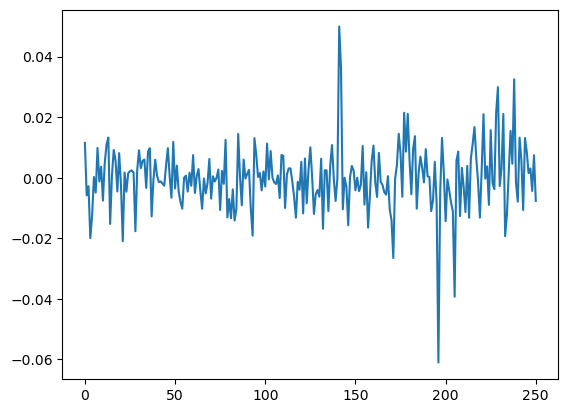

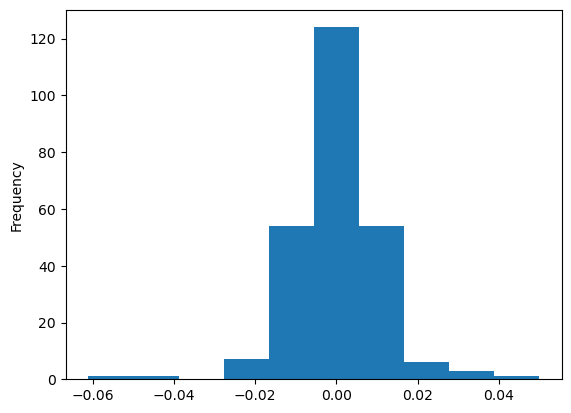

Daily average return: -0.00010576532671025516
Annualized average return: -0.02630218196898615
Daily standard deviation of return (volatility): 0.010675218628584232
Annualized standard deviation of return (volatility): 0.010675218628584232
Skewness of returns distribution: -0.21146357199824936
Kurtosis of returns distribution: 9.21438525534264
Shapiro results: ShapiroResult(statistic=0.9260478019714355, pvalue=7.259323142605467e-10)
P-value:  7.259323142605467e-10 < 0.05 => the data distribution is non-normal
--------------------------------------------------
Stock code: XOM


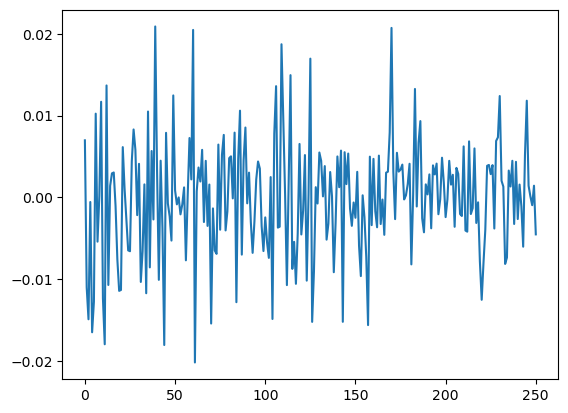

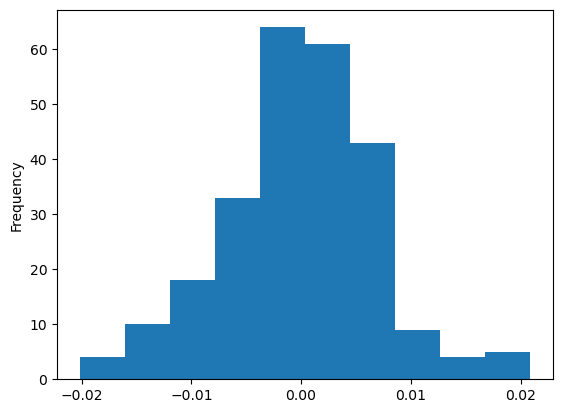

Daily average return: -0.00012990937005839817
Annualized average return: -0.03220915848805972
Daily standard deviation of return (volatility): 0.007029015509737746
Annualized standard deviation of return (volatility): 0.007029015509737746
Skewness of returns distribution: -0.020208300413870898
Kurtosis of returns distribution: 3.633055534665514
Shapiro results: ShapiroResult(statistic=0.9860367178916931, pvalue=0.014987028203904629)
P-value:  0.014987028203904629 < 0.05 => the data distribution is non-normal
--------------------------------------------------


In [25]:
for stock in stocks:
    print("Stock code:", stock)
    
    # Calculate the daily returns of the close price
    stock_returns = df[stock]
    
    # Plot the daily returns
    stock_returns.plot()
    plt.show()
    
    # Plot the returns distribution
    stock_returns.plot.hist()
    plt.show()
    
    # Calculate the average daily return of the stock
    mean_return_daily = stock_returns.mean()
    print("Daily average return:", mean_return_daily)
    
    # Calculate the implied annualized average return (252 is the number of trading days in a year)
    mean_return_annualized = ((1 + mean_return_daily) ** 252) - 1
    print("Annualized average return:", mean_return_annualized)
    
    # Calculate the standard deviation of daily return of the stock
    sigma_daily = np.std(stock_returns)
    print("Daily standard deviation of return (volatility):", sigma_daily)
    
    # Calculate the daily variance
    variance_daily = sigma_daily ** 2
    
    # Annualize the standard deviation
    sigma_annualized = sigma_daily*np.sqrt(252)
    print("Annualized standard deviation of return (volatility):", sigma_daily)
    
    # Calculate the annualized variance
    variance_annualized = sigma_annualized ** 2

    # Calculate the third moment (skewness) of the returns distribution
    returns_skewness = skew(stock_returns)
    print("Skewness of returns distribution:", returns_skewness)
    
    # Calculate the excess kurtosis of the returns distribution
    excess_kurtosis = kurtosis(stock_returns)

    # Derive the true fourth moment of the returns distribution
    fourth_moment = excess_kurtosis + 3
    print("Kurtosis of returns distribution:", fourth_moment)
    
    # Run the Shapiro-Wilk test on the stock returns
    shapiro_results = shapiro(stock_returns)
    print("Shapiro results:", shapiro_results)

    # Extract the p-value from the shapiro_results
    p_value = shapiro_results[1]
    if p_value < 0.05:
        print("P-value: ", p_value, "< 0.05 => the data distribution is non-normal")
    else:
        print("P-value: ", p_value, ">= 0.05 => the data distribution can be normal")
        
    print("-" * 50)

## Part 2: Portfolio Investing

In [7]:
df.set_index('Date', inplace=True)

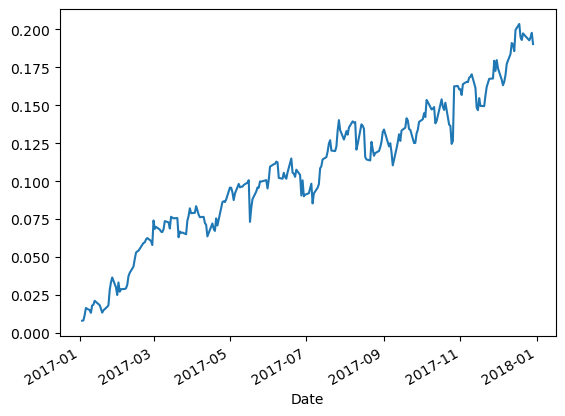

In [8]:
# Finish defining the portfolio weights as a numpy array
# Portfolio weights should sum to 100% in most cases
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])
assert portfolio_weights.sum() == 1.00

# Calculate the weighted stock returns
WeightedReturns = df * portfolio_weights

# Calculate the portfolio returns
PortfolioReturns = WeightedReturns.sum(axis=1)

# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1+PortfolioReturns).cumprod()-1)
CumulativeReturns.plot()
plt.show()

**Comparing weighted portfolio with equally weighted portfolio**

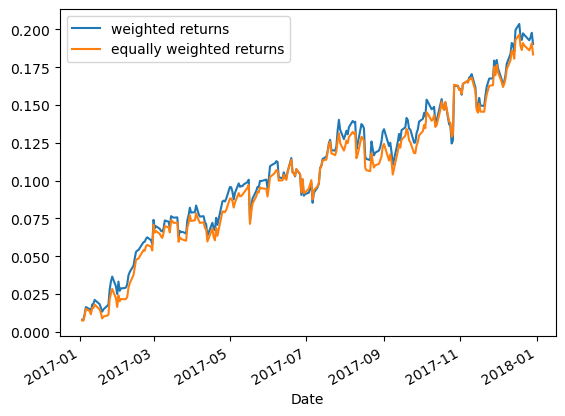

In [13]:
numstocks = 9

# Create an array of equal weights across all assets
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)

# Calculate the equally-weighted portfolio returns
EquallyWeightedPortfolioReturns = (df * portfolio_weights_ew).sum(axis=1)

# Plot the cumulative portfolio returns over time
CumulativeEquallyWeightedReturns = ((1+EquallyWeightedPortfolioReturns).cumprod()-1)
CumulativeReturns.plot(label='weighted returns')
CumulativeEquallyWeightedReturns.plot(label='equally weighted returns')
plt.legend()
plt.show()

**Market-cap weighted portfolio**

Conversely, when large companies are doing well, market capitalization, or "market cap" weighted portfolios tend to outperform. This is because the largest weights are being assigned to the largest companies, or the companies with the largest market cap.

*Market capitalization:* the value of a company's publicly traded shares.

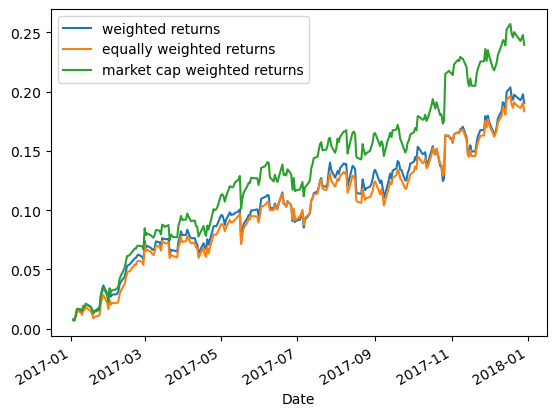

In [31]:
# Create an array of market capitalizations (in billions)
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])

# Calculate the market cap weights
mcap_weights = market_capitalizations / market_capitalizations.sum()

# Calculate the market cap weighted portfolio returns
MCapWeightedReturns = (df * mcap_weights).sum(axis=1)

# Plot the cumulative portfolio returns over time
CumulativeMCapWeightedReturns = ((1+MCapWeightedReturns).cumprod()-1)
CumulativeReturns.plot(label='weighted returns')
CumulativeEquallyWeightedReturns.plot(label='equally weighted returns')
CumulativeMCapWeightedReturns.plot(label='market cap weighted returns')
plt.legend()
plt.show()

**Retrieve the correlation between assets/stocks**

Correlation shows relationships between assets.

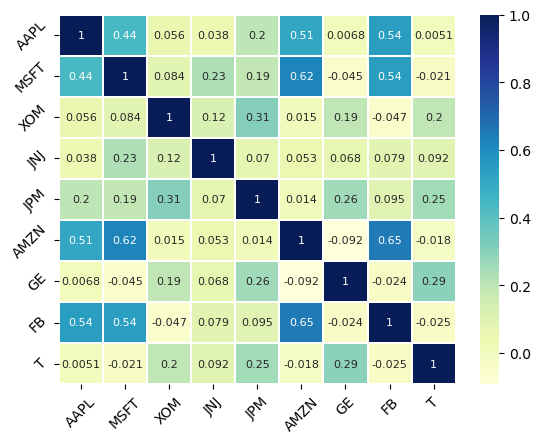

In [23]:
import seaborn as sns

sns.heatmap(df.corr(),
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

plt.xticks(rotation=45)
plt.yticks(rotation=45) 
plt.show()

**Retrieve the co-variance matrix between assets**

The covariance matrix tells about variance of underlying assets. In probability theory and statistics, covariance is a measure of the joint variability of two random variables.

In [25]:
# Calculate the covariance matrix
cov_mat = df.cov()

# Annualize the co-variance matrix
cov_mat_annual = cov_mat * 252

# Print the annualized co-variance matrix
display(cov_mat_annual)

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
AAPL,0.030996,0.011400,0.001093,0.000774,0.005716,0.018805,0.000236,0.016243,0.000152
MSFT,0.011400,0.021912,0.001392,0.003899,0.004597,0.019275,-0.001315,0.013682,-0.000530
XOM,0.001093,0.001392,0.012500,0.001548,0.005554,0.000354,0.004295,-0.000890,0.003751
JNJ,0.000774,0.003899,0.001548,0.013092,0.001307,0.001266,0.001540,0.001545,0.001780
JPM,0.005716,0.004597,0.005554,0.001307,0.026371,0.000474,0.008283,0.002631,0.006972
AMZN,0.018805,0.019275,0.000354,0.001266,0.000474,0.043954,-0.003830,0.023290,-0.000638
GE,0.000236,-0.001315,0.004295,0.001540,0.008283,-0.003830,0.039270,-0.000821,0.009849
FB,0.016243,0.013682,-0.000890,0.001545,0.002631,0.023290,-0.000821,0.028937,-0.000708
T,0.000152,-0.000530,0.003751,0.001780,0.006972,-0.000638,0.009849,-0.000708,0.028833


**Portfolio standard deviation (Portfolio volatility)**

Portfolio volatility is a measure of portfolio risk, calculated by:

$$\sigma_{\text{Portfolio}} = \sqrt{w^T \cdot \sum \cdot w}$$

where:
- $\sigma_{\text{Portfolio}}$: Portfolio volatility
- $\sum$: Covariance matrix of returns
- $w$: Portfolio weights

In [26]:
# Calculate the portfolio standard deviation
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print(portfolio_volatility)

0.08931417642713795


**Markowitz portfolio**

Given $n$ randomly generated portfolio with given annualized expected return and annualized volatility, how do we choose the best portfolio?

*Sharpe ratio*: A measure of **risk-adjusted return**.

$$S = \frac{R_a - r_f}{\sigma_a}$$

where:
- $S$: Sharpe Ratio
- $R_a$: Asset return
- $r_f$: Risk-free rate of return (a theoretical return on an investment that carries no risk, for the exercise this can be set to 0)
- $\sigma_a$: Asset volatility

*An efficient frontier of portfolios* will be each with the highest expected return for a given level of risk (essentially portfolios on the top left edge when plotted with risk on x-axis and expected return on y-axis).

Any point on the efficient frontier is an **optimum portfolio**.

There are 2 common points which are called **Markowitze Portfolio**:
- MSR: Max Sharpe Ratio portfolio
- GMV: Global Minimum Volatility portfolio

In [28]:
portfolio_df = pd.read_csv('EfficientFrontierPortfoliosSlim.csv')
portfolio_df.head()

,AAPL weight,MSFT weight,XOM weight,JNJ weight,JPM weight,AMZN weight,GE weight,FB weight,T weight,Returns,Volatility
0,0.000053,0.263110,0.007022,0.040087,0.000027,0.024316,0.355899,0.299400,0.010087,0.127453,0.171565
1,0.042360,0.034922,0.079355,0.043057,0.001435,0.202032,0.225924,0.362324,0.008590,0.138614,0.182723
2,0.207824,0.002132,0.005982,0.041657,0.007498,0.406642,0.064929,0.229260,0.034075,0.155952,0.201185
3,0.096565,0.016775,0.118409,0.037725,0.020013,0.045195,0.512282,0.153015,0.000020,0.118787,0.148958
4,0.131309,0.002733,0.002360,0.047573,0.050633,0.289410,0.313717,0.157123,0.005141,0.138304,0.171473


In [30]:
# Risk free rate
risk_free = 0

# Calculate the Sharpe Ratio for each asset
portfolio_df['Sharpe'] = (portfolio_df['Returns'] - risk_free) / portfolio_df['Volatility']
portfolio_df['Sharpe'].describe()

count    39.000000
mean      1.426826
std       0.576101
min       0.742884
25%       0.821737
50%       1.704713
75%       2.004199
max       2.270462
Name: Sharpe, dtype: float64

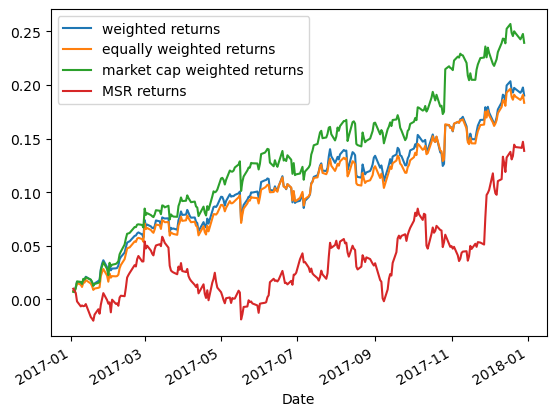

In [33]:
# Sort the portfolios by Sharpe ratio
sorted_portfolios = portfolio_df.sort_values(by=['Sharpe'], ascending=False)

# Extract the corresponding weights
MSR_weights = sorted_portfolios.iloc[0, :numstocks]

# Cast the MSR weights as a numpy array
MSR_weights_array = np.array(MSR_weights)

# Calculate the MSR portfolio returns
MSRReturn = (df.iloc[:, :numstocks] * MSR_weights_array).sum(axis=1)

# Plot the cumulative returns
CumulativeMSRReturn = ((1+MSRReturn).cumprod()-1)
CumulativeReturns.plot(label='weighted returns')
CumulativeEquallyWeightedReturns.plot(label='equally weighted returns')
CumulativeMCapWeightedReturns.plot(label='market cap weighted returns')
CumulativeMSRReturn.plot(label='MSR returns')
plt.legend()
plt.show()

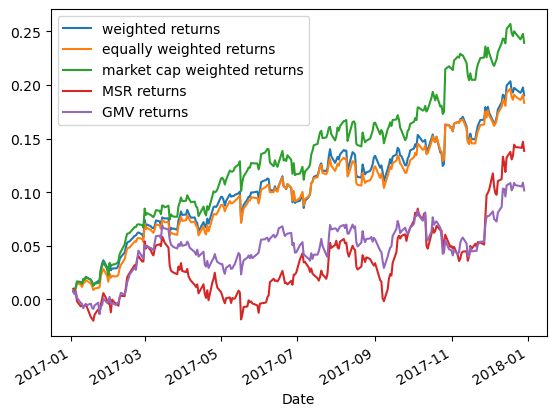

In [36]:
# Sort the portfolios by volatility
sorted_portfolios = portfolio_df.sort_values(by=['Volatility'], ascending=True)

# Extract the corresponding weights
GMV_weights = sorted_portfolios.iloc[0, :numstocks]

# Cast the MSR weights as a numpy array
GMV_weights_array = np.array(GMV_weights)

# Calculate the MSR portfolio returns
GMVReturn = (df.iloc[:, :numstocks] * GMV_weights_array).sum(axis=1)

# Plot the cumulative returns
CumulativeGMVReturn = ((1+GMVReturn).cumprod()-1)
CumulativeReturns.plot(label='weighted returns')
CumulativeEquallyWeightedReturns.plot(label='equally weighted returns')
CumulativeMCapWeightedReturns.plot(label='market cap weighted returns')
CumulativeMSRReturn.plot(label='MSR returns')
CumulativeGMVReturn.plot(label='GMV returns')
plt.legend()
plt.show()

## Part 3: Factor Analysis

Factor Analysis is the practice of using known factors such as the returns of large stocks or growth stocks as independent variables in the analysis of portfolio returns.

**The Capital Asset Pricing Model**

$$E(R_P) - RF = \beta_P(E(R_M) - RF)$$

where:
- $E(R_P) - RF$: The excess expected return of a stock or portfolio $P$
- $E(R_M) - RF$: The excess expected return of the broad market portfolio $B$(\*)
- $RF$: The regional risk free-rate
- $\beta_P$: Portfolio beta, or exposure, to the broad market portfolio B

Alternatively:

$$\beta_P = \frac{\text{Cov}(R_P, R_B)}{\text{Var}(R_B)}$$

Alternatively:

$$y = X\beta + \epsilon$$

where $X$ is the market excess, $y$ is the portfolio excess.

Linear regression model is evaluated using r-squared or adjusted r-squared (adjusted r-squared is recommended to avoid overfitting).

(\*): a broad market portfolio is a diversified investment portfolio that includes a representative sample of stocks or other securities from a broad range of industries or sectors. 

**Beta intuition**

For every 1.0% rise (or fall) in the market, the portfolio is expected to rise (fall) roughly $\beta$%

In [37]:
FamaFrenchData = pd.read_csv('FamaFrenchFactors.csv')
FamaFrenchData.head()

,Date,Portfolio,Market_Excess,SMB,HML,RMW,CMA,RF
0,2013-01-03,-0.005066,-0.0014,0.0014,0.0004,0.0020,0.0023,0.0
1,2013-01-04,0.004024,0.0055,0.0019,0.0043,-0.0037,0.0027,0.0
2,2013-01-07,0.004421,-0.0031,-0.0009,-0.0037,-0.0013,-0.0012,0.0
3,2013-01-08,-0.004659,-0.0027,0.0004,-0.0007,-0.0012,0.0009,0.0
4,2013-01-09,0.004636,0.0034,0.0024,-0.0041,-0.0007,-0.0015,0.0


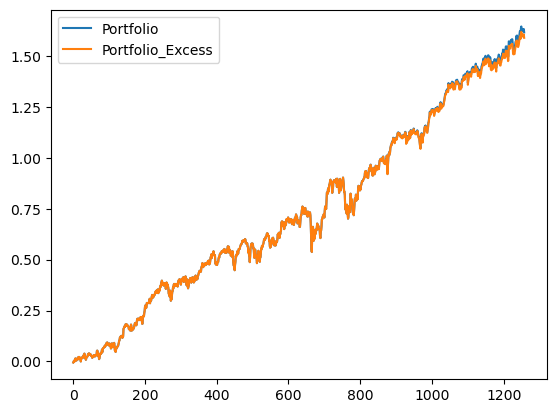

In [38]:
# Calculate excess portfolio returns
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio'] - FamaFrenchData['RF']

# Plot returns vs excess returns
CumulativeReturns = ((1+FamaFrenchData[['Portfolio','Portfolio_Excess']]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

In [41]:
# Calculate the co-variance matrix between Portfolio_Excess and Market_Excess
covariance_matrix = FamaFrenchData[['Portfolio_Excess', 'Market_Excess']].cov()

# Extract the co-variance co-efficient
covariance_coefficient = covariance_matrix.iloc[0, 1]
print("Covariance coefficient:", covariance_coefficient)

# Calculate the benchmark variance
benchmark_variance = FamaFrenchData['Market_Excess'].var()
print("Benchmark variance:", benchmark_variance)

# Calculating the portfolio market beta
portfolio_beta = covariance_coefficient / benchmark_variance
print("Portfolio beta:", portfolio_beta)

Covariance coefficient: 5.726126338154964e-05
Benchmark variance: 5.8803350882118946e-05
Portfolio beta: 0.9737755165745456


In [42]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
CAPM_model = smf.ols(formula="Portfolio_Excess ~ Market_Excess", data=FamaFrenchData)

# Print adjusted r-squared of the fitted regression
CAPM_fit = CAPM_model.fit()
print("Adjusted R-squared: ", CAPM_fit.rsquared_adj)

# Extract the beta
regression_beta = CAPM_fit.params["Market_Excess"]
print("Regression beta:", regression_beta)

Adjusted R-squared:  0.7942627160017839
Regression beta: 0.9737755165745456


**Alpha and multi-factor models**

DataCamp: *"The Fama-French 3 factor model is the most widely used model for portfolio management in finance"*

$$R_P = RF + \beta_M(R_M - RF) + b_{SMB} \cdot SMB + b_{HML} \cdot HML + \alpha$$

where:
- SMB: The small minus big factor
- $b_{SMB}$: Exposure to the SMB factor
- HML: The high minus low factor
- $b_{HML}$: Exposure to the HML factor
- $\alpha$: Performance which is unexplained by any other factors
- $\beta_M$: Beta to the broad market portfolio $B$.

In specific:
- The **HML factor** is constructed by calculating the return of **growth** stocks (stocks with high valuations), versus the return of **value** stocks.
- The **SMB factor** is constructed by calculating the return of **small-cap** stocks (stocks with small market capitalizations), versus the return of **large-cap** stocks.

In [43]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
FamaFrench_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML', data=FamaFrenchData)

# Fit the regression
FamaFrench_fit = FamaFrench_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench_fit.rsquared_adj
print(regression_adj_rsq)

0.8193910088585152


The adjusted r-squared raised from 0.7943 to 0.8194, meaning that the model explains more of the portfolio variance.

In [44]:
# Extract the p-value of the SMB factor
smb_pval = FamaFrench_fit.pvalues["SMB"]

# If the p-value is significant, print significant
if smb_pval < 0.05:
    significant_msg = 'significant'
else:
    significant_msg = 'not significant'

# Print the SMB coefficient
smb_coeff = FamaFrench_fit.params["SMB"]
print("The SMB coefficient is ", smb_coeff, " and is ", significant_msg)

The SMB coefficient is  -0.2621515274319265  and is  significant


In [45]:
# Calculate your portfolio alpha
portfolio_alpha = FamaFrench_fit.params["Intercept"]
print(portfolio_alpha)

# Annualize your portfolio alpha
portfolio_alpha_annualized = ((1 + portfolio_alpha) ** 252) - 1
print(portfolio_alpha_annualized)

0.00018326665203182978
0.04726181730280854


**Expanding the 3-factor model (Reading)**

*5-factor model*: Adding **RMW** (Profitability) and **CMA** (Investment).
- The **RMW factor** represents the returns of companies with high operating profitability versus those with low operating profitability.
- The **CMA factor** represents the returns of companies with aggressive investments versus those who are more conservative.

In [46]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
FamaFrench5_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML + RMW + CMA ', data=FamaFrenchData)

# Fit the regression
FamaFrench5_fit = FamaFrench5_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench5_fit.rsquared_adj
print(regression_adj_rsq)

0.8367245019225793


## Part 4: Value at Risk

**Estimating tail risk**

*Tail risk* is the risk of extreme investment outcomes, most notably on the negative side of a distribution.

Estimating tail risk methodologies:
- Historical drawdowns
- Value at Risk
- Conditional Value at Risk
- Monte-Carlo Simulation

In [53]:
uso = pd.read_csv('USO.csv', parse_dates=['Date'], index_col='Date')
uso.head()

,USO
Date,
2007-01-03,-0.042636
2007-01-04,-0.040688
2007-01-05,0.009285
2007-01-08,-0.007109
2007-01-09,-0.004001


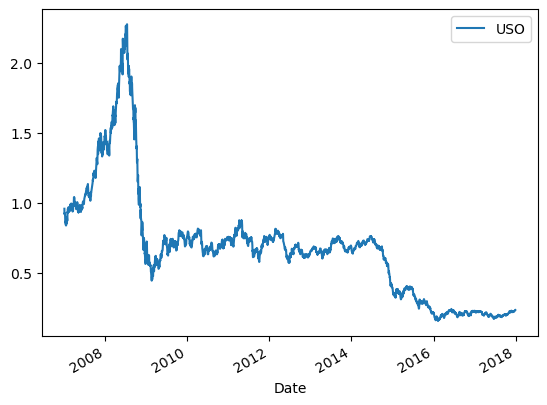

In [57]:
cum_rets = (1 + uso).cumprod()
cum_rets.plot()
plt.show()

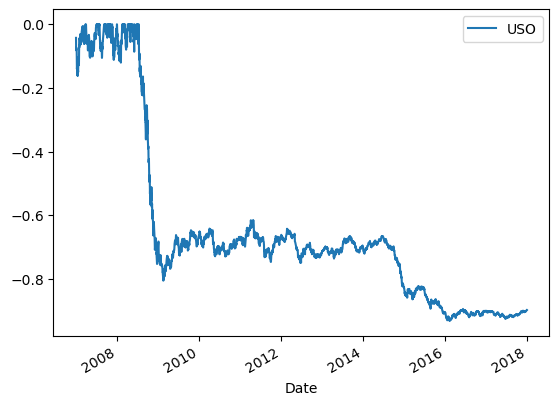

In [58]:
# Calculate the running maximum
running_max = np.maximum.accumulate(cum_rets)

# Ensure the value never drops below 1
running_max[running_max < 1] = 1

# Calculate the percentage drawdown
drawdown = (cum_rets)/running_max - 1

# Plot the results
drawdown.plot()
plt.show()

-3.608233764037496


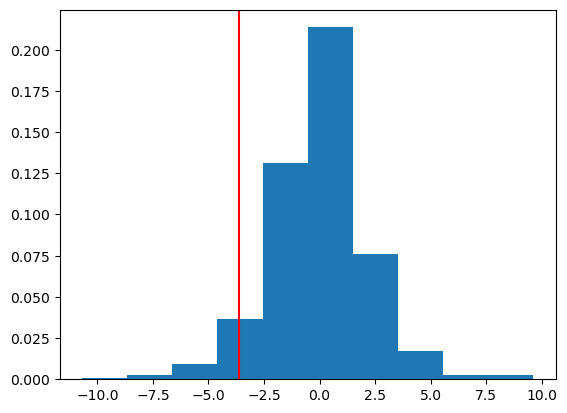

In [67]:
StockReturns_perc = uso * 100

# Calculate historical VaR(95)
var_95 = np.quantile(StockReturns_perc, 0.05)
print(var_95)

# Sort the returns for plotting
sorted_rets = StockReturns_perc.sort_values(by="USO")

# Plot the probability of each sorted return quantile
plt.hist(sorted_rets, density=True, stacked=True)

# Denote the VaR 95 quantile
plt.axvline(x=var_95, color='r', linestyle='-', label="VaR 95: {0:.2f}%".format(var_95))
plt.show()

In [60]:
StockReturns_perc

,USO
Date,
2007-01-03,-4.263558
2007-01-04,-4.068832
2007-01-05,0.928472
2007-01-08,-0.710851
2007-01-09,-0.400091
...,...
2017-12-22,0.171821
2017-12-26,2.487136
2017-12-27,-0.251046


-5.054143158346779


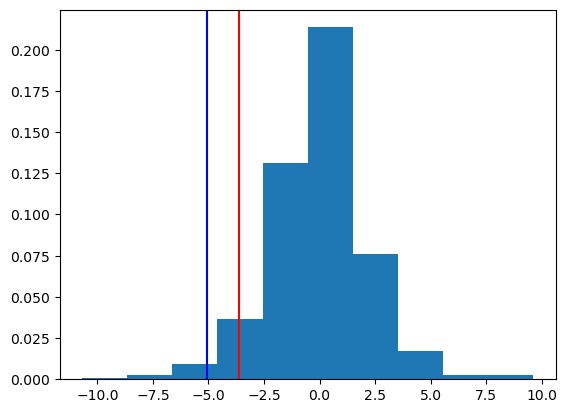

In [69]:
# Historical CVaR 95
cvar_95 = StockReturns_perc[StockReturns_perc <= var_95].mean().values[0]
print(cvar_95)

# Plot the probability of each return quantile
plt.hist(sorted_rets, density=True, stacked=True)

# Denote the VaR 95 and CVaR 95 quantiles
plt.axvline(x=var_95, color="r", linestyle="-", label='VaR 95: {0:.2f}%'.format(var_95))
plt.axvline(x=cvar_95, color='b', linestyle='-', label='CVaR 95: {0:.2f}%'.format(cvar_95))
plt.show()

**Simulate a distribution to calculate parametric VaR**

In [71]:
# Import norm from scipy.stats
from scipy.stats import norm

# Estimate the average daily return
mu = np.mean(uso)

# Estimate the daily volatility
vol = np.std(uso)

# Set the VaR confidence level
confidence_level = 0.05

# Calculate Parametric VaR
var_95 = norm.ppf(confidence_level, mu, vol)
print('Mean: ', str(mu), '\nVolatility: ', str(vol), '\nVaR(95): ', str(var_95))

Mean:  USO   -0.000286
dtype: float64 
Volatility:  USO    0.021888
dtype: float64 
VaR(95):  [-0.03628909]


**Random Walks**

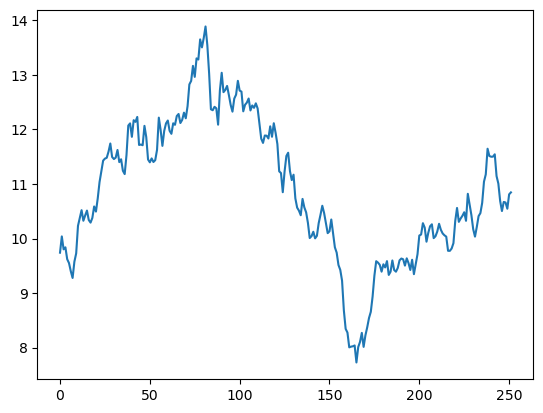

In [74]:
# Set the simulation parameters
mu = np.mean(uso)
vol = np.std(uso)
T = 252
S0 = 10

# Add one to the random returns
rand_rets = np.random.normal(mu, vol, T) + 1

# Forecasted random walk
forecasted_values = S0 * (rand_rets.cumprod())

# Plot the random walk
plt.plot(range(0, T), forecasted_values)
plt.show()

**Monte Carlo VaR**

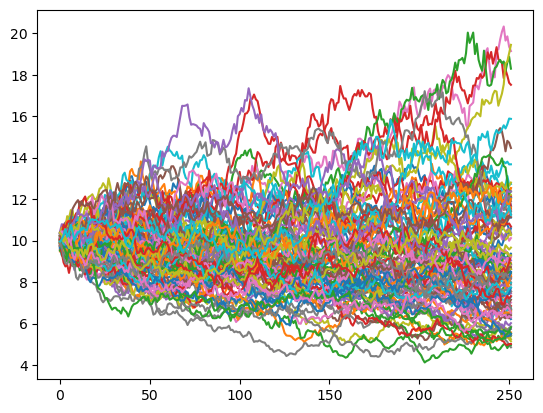

In [75]:
# Loop through 100 simulations
for i in range(100):

    # Generate the random returns
    rand_rets = np.random.normal(mu, vol, T) + 1
    
    # Create the Monte carlo path
    forecasted_values = S0*(rand_rets).cumprod()
    
    # Plot the Monte Carlo path
    plt.plot(range(T), forecasted_values)

# Show the simulations
plt.show()

In [76]:
# Aggregate the returns
sim_returns = []

# Loop through 100 simulations
for i in range(100):

    # Generate the Random Walk
    rand_rets = np.random.normal(mu, vol, T)
    
    # Save the results
    sim_returns.append(rand_rets)

# Calculate the VaR(99)
var_99 = np.percentile(sim_returns, 1)
print("Parametric VaR(99): ", round(100*var_99, 2),"%")

Parametric VaR(99):  -5.12 %
